### Arab Barometer Survey, 2012-2014

I want to investigate relationships between Arab socioeconomic status and feeling toward the Arab Spring.

In [164]:
import pandas as pd
pd.set_option('display.max_columns', 60)

df = pd.read_csv('https://raw.githubusercontent.com/bsmrvl/Unit-1-Build/master/ABIII_English.csv', dtype='string')
print(df.shape)

(14809, 296)


In [165]:
# df = df[df['country'] == 'Tunisia']

In [166]:
df.dtypes.value_counts()

string    296
dtype: int64

In [167]:
df.head()

,qid,bid,country,date,wt,form,samp,a1,q1,q13,v13,sex,q101,q102,q102_insh,q102a,q103,q103_insh,q104,q104_insh,q105,q105_insh,q105a,q106,q2011,q2013,q2014,q2016,q2017,q20112,...,q1001,q1002,q1003,q1003t,q1003yem,q1004,q1005,q1006,q1006a,q1007,q1007a,q1009,q1010,q1011,q1011a,q1011b,q1012,q1012a,q1013,q1014,q1015,q1016,q1017,q1019_1,q1019_2,q1020jo,q2001ir,q2003,q2004ir,q2005kw
0,1,1,Algeria,31 Mar 13,.8432402610778809,Form B,Main sample,South,Laghouat,Urban,<NA>,Male,Very good,Much better,Yes,Much worse,Most people are not trustworthy,No,"Yes, for economic and political reasons",No,Fully ensured,No,Same as last year,To a limited extent,I trust it to a medium extent,I absolutely do not trust it,I trust it to a medium extent,I trust it to a medium extent,I trust it to a great extent,I trust it to a medium extent,...,40,Male,Prepartory/Basic,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,<NA>,Owned,19000,38000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>,<NA>,<NA>,<NA>,<NA>
1,2,1,Algeria,31 Mar 13,.6745921969413757,Form A,Main sample,South,Laghouat,Urban,<NA>,Female,Good,Somewhat better,Yes,Don't know,Most people are not trustworthy,No,Refuse,No,Not ensured,No,Worse than last year,To a limited extent,I absolutely do not trust it,I absolutely do not trust it,I trust it to a medium extent,I trust it to a great extent,I absolutely do not trust it,I absolutely do not trust it,...,41,Female,Mid-level diploma (professional or technical,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,<NA>,Rented,Refuse,Refuse,Refuse,Refuse,Arabic,Amazigh,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,1,Algeria,31 Mar 13,.8432402610778809,Form A,Main sample,South,Laghouat,Urban,<NA>,Male,Bad,Somewhat better,Yes,Similar,Most people are not trustworthy,No,"No, I do not think about emigrating",No,Absolutely not ensured,No,Worse than last year,Don't know,I absolutely do not trust it,I absolutely do not trust it,I trust it to a great extent,I trust it to a great extent,I absolutely do not trust it,I absolutely do not trust it,...,44,Male,Elementary,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Bachelor,<NA>,Yes,Yes,Muslim,<NA>,Other,20000,30000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>,<NA>,<NA>,<NA>,<NA>
3,4,1,Algeria,31 Mar 13,1.011888265609741,Form B,Main sample,South,Laghouat,Urban,<NA>,Female,Good,Almost the same as the current situation,No,Similar,Most people are not trustworthy,No,"Yes, for economic and political reasons",No,Ensured,No,Same as last year,To a great extent,I trust it to a medium extent,I trust it to a great extent,I trust it to a great extent,I trust it to a great extent,I trust it to a great extent,I absolutely do not trust it,...,56,Female,Elementary,<NA>,<NA>,No,A housewife,<NA>,<NA>,<NA>,<NA>,<NA>,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,<NA>,Owned,Don't know,57000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>,<NA>,<NA>,<NA>,<NA>
4,5,1,Algeria,31 Mar 13,1.011888265609741,Form B,Main sample,South,Laghouat,Urban,<NA>,Male,Good,Somewhat better,No,Similar,Most people are not trustworthy,No,"No, I do not think about emigrating",No,Fully ensured,No,Better than last year,To a great extent,I trust it to a limited extent,I trust it to a medium extent,I trust it to a medium extent,I trust it to a medium extent,I trust it to a limited extent,I trust it to a medium extent,...,48,Male,Elementary,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,End of service gratuity,Married,House

### Break 296-column dataset into sections (as determined by questionnaire)

The two important subsets are df_spring (opinions on the Spring) and df_personal (demographics).

In [168]:
df_sampling          = df.loc[:,'qid':'sex']

In [169]:
df_general           = pd.concat([df['qid'], df.loc[:,'q101':'q106']], axis=1)
df_political_att     = pd.concat([df['qid'], df.loc[:,'q2011':'q240']], axis=1)
df_elections         = pd.concat([df['qid'], df.loc[:,'q301':'q304']], axis=1)
df_media             = pd.concat([df['qid'], df.loc[:,'q402':'q4115']], axis=1)
df_democracy         = pd.concat([df['qid'], df.loc[:,'q5012':'q530']], axis=1)
df_socio_cultural    = pd.concat([df['qid'], df.loc[:,'q6012':'q618']], axis=1)
df_international     = pd.concat([df['qid'], df.loc[:,'q7001':'q713']], axis=1)
df_spring            = pd.concat([df['qid'], df.loc[:,'q800a':'q818yem']], axis=1).astype('str')
df_personal          = pd.concat([df['qid'], df.loc[:,'q1001':'q2003']], axis=1).astype('str')

#### Clean 'df_personal'

In [170]:
df_personal.head()

,qid,q1001,q1002,q1003,q1003t,q1003yem,q1004,q1005,q1006,q1006a,q1007,q1007a,q1009,q1010,q1011,q1011a,q1011b,q1012,q1012a,q1013,q1014,q1015,q1016,q1017,q1019_1,q1019_2,q1020jo,q2001ir,q2003
0,1,40,Male,Prepartory/Basic,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,<NA>,Owned,19000,38000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>,<NA>,<NA>
1,2,41,Female,Mid-level diploma (professional or technical,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,<NA>,Rented,Refuse,Refuse,Refuse,Refuse,Arabic,Amazigh,<NA>,<NA>,<NA>
2,3,44,Male,Elementary,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Bachelor,<NA>,Yes,Yes,Muslim,<NA>,Other,20000,30000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>,<NA>,<NA>
3,4,56,Female,Elementary,<NA>,<NA>,No,A housewife,<NA>,<NA>,<NA>,<NA>,<NA>,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,<NA>,Owned,Don't know,57000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>,<NA>,<NA>
4,5,48,Male,Elementary,<NA>,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,End of service gratuity,Married,Housewife,No,Yes,Muslim,<NA>,Owned,24000,34000,Our household income does not cover our expens...,We do not receive anything,Arabic,Does not speak second language,<NA>,<NA>,<NA>


In [171]:
df_personal.dtypes

qid         object
q1001       object
q1002       object
q1003       object
q1003t      object
q1003yem    object
q1004       object
q1005       object
q1006       object
q1006a      object
q1007       object
q1007a      object
q1009       object
q1010       object
q1011       object
q1011a      object
q1011b      object
q1012       object
q1012a      object
q1013       object
q1014       object
q1015       object
q1016       object
q1017       object
q1019_1     object
q1019_2     object
q1020jo     object
q2001ir     object
q2003       object
dtype: object

In [172]:
df_personal = df_personal.rename(columns={'q1001':'age', 
                                          'q1002':'sex', 
                                          'q1003t':'education',
                                          'q1004':'work?', 
                                          'q1005':'work_alt', 
                                          'q1006':'full/part',
                                          'q1006a':'sector', 
                                          'q1007':'position_public',
                                          'q1007a':'position_private', 
                                          'q1009':'unemployment',
                                          'q1010':'mar_status', 
                                          'q1011':'spouse_job',
                                          'q1011a':'computer',
                                          'q1011b':'car', 
                                          'q1012':'religion', 
                                          'q1012a':'denomination',
                                          'q1013':'housing',
                                          'q1014':'income', 
                                          'q1015':'household_income', 
                                          'q1016':'income_enough', 
                                          'q1017':'remittances',
                                          'q1019_1':'1st_language', 
                                          'q1019_2':'2nd_language',
                                          'q2003':'appearance'})

In [173]:
df_personal = df_personal.drop(['q1003','q1003yem','q1020jo','q2001ir'], axis=1)
df_personal.head()

,qid,age,sex,education,work?,work_alt,full/part,sector,position_public,position_private,unemployment,mar_status,spouse_job,computer,car,religion,denomination,housing,income,household_income,income_enough,remittances,1st_language,2nd_language,appearance
0,1,40,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,<NA>,Owned,19000,38000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>
1,2,41,Female,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,<NA>,Rented,Refuse,Refuse,Refuse,Refuse,Arabic,Amazigh,<NA>
2,3,44,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Bachelor,<NA>,Yes,Yes,Muslim,<NA>,Other,20000,30000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>
3,4,56,Female,<NA>,No,A housewife,<NA>,<NA>,<NA>,<NA>,<NA>,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,<NA>,Owned,Don't know,57000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,<NA>
4,5,48,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,End of service gratuity,Married,Housewife,No,Yes,Muslim,<NA>,Owned,24000,34000,Our household income does not cover our expens...,We do not receive anything,Arabic,Does not speak second language,<NA>


In [174]:
df_personal.isnull().sum()

qid                 0
age                 0
sex                 0
education           0
work?               0
work_alt            0
full/part           0
sector              0
position_public     0
position_private    0
unemployment        0
mar_status          0
spouse_job          0
computer            0
car                 0
religion            0
denomination        0
housing             0
income              0
household_income    0
income_enough       0
remittances         0
1st_language        0
2nd_language        0
appearance          0
dtype: int64

In [175]:
df_personal = df_personal.drop(['denomination','appearance'], axis=1)
df_personal.head()

,qid,age,sex,education,work?,work_alt,full/part,sector,position_public,position_private,unemployment,mar_status,spouse_job,computer,car,religion,housing,income,household_income,income_enough,remittances,1st_language,2nd_language
0,1,40,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,Owned,19000,38000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh
1,2,41,Female,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,Rented,Refuse,Refuse,Refuse,Refuse,Arabic,Amazigh
2,3,44,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Bachelor,<NA>,Yes,Yes,Muslim,Other,20000,30000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh
3,4,56,Female,<NA>,No,A housewife,<NA>,<NA>,<NA>,<NA>,<NA>,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,Owned,Don't know,57000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh
4,5,48,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,End of service gratuity,Married,Housewife,No,Yes,Muslim,Owned,24000,34000,Our household income does not cover our expens...,We do not receive anything,Arabic,Does not speak second language


In [176]:
### Find non-numbers in columns which should be numeric.

sorted(df_personal['income'].unique(), reverse=True)[0:6]

['Refuse', 'Not specified', 'No income', 'Missing', "Don't know", '9900']

In [177]:
sorted(df_personal['household_income'].unique(), reverse=True)[0:7]

['Refuse',
 'Not specified',
 'No income',
 'Missing',
 "Don't know",
 '<NA>',
 '9900']

In [178]:
import numpy as np

df_personal['age'] = df_personal['age'].replace({'Refuse': np.NaN, 'Missing':np.NaN})

df_personal['income'] = df_personal['income'].replace({'No income':'0', 'Not specified':np.NaN,
                                                       'Don\'t know':np.NaN, 'Refuse':np.NaN,
                                                       'Missing':np.NaN})

df_personal['household_income'] = df_personal['household_income'].astype('str').replace({'No income':'0', 'Not specified':np.NaN,
                                                                           'Don\'t know':np.NaN, 'Refuse':np.NaN,
                                                                           'Missing':np.NaN, '<NA>':np.NaN})

In [179]:
df_personal['age'] = df_personal['age'].astype('float')
df_personal['income'] = df_personal['income'].astype('float')
df_personal['household_income'] = df_personal['household_income'].astype('float')

In [180]:
df_personal.head()

,qid,age,sex,education,work?,work_alt,full/part,sector,position_public,position_private,unemployment,mar_status,spouse_job,computer,car,religion,housing,income,household_income,income_enough,remittances,1st_language,2nd_language
0,1,40.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,Owned,19000.0,38000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh
1,2,41.0,Female,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,Rented,NaN,NaN,Refuse,Refuse,Arabic,Amazigh
2,3,44.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Public,A governmental employee,<NA>,Pension at the conclusion of service,Bachelor,<NA>,Yes,Yes,Muslim,Other,20000.0,30000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh
3,4,56.0,Female,<NA>,No,A housewife,<NA>,<NA>,<NA>,<NA>,<NA>,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,Owned,NaN,57000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh
4,5,48.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,End of service gratuity,Married,Housewife,No,Yes,Muslim,Owned,24000.0,34000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Does not speak second language


#### Clean 'df_spring'

In [181]:
df_spring.head()

,qid,q800a,q800b,q800c,q800d1,q800d2,q800d3,q800d4,q800d5,q800d6,q800d7,q800d8,q800d9,q810a,q8111,q8112,q8113,q811a1,q811a2,q811a3,q812a1,q812a2,q812a3,q812a4,q812a5,q812a6,q812a7,q812a8,q817a,q818yem
0,1,"No, I did not",<NA>,I did not care to participate / It was not imp...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Betterment of the economic situation,Increased social justice,Social and economic justice,Yes,Yes,No,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,"A relationship of brotherhood, citizenship and...",<NA>
1,2,"No, I did not",<NA>,I did not care to participate / It was not imp...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Betterment of the economic situation,Other,<NA>,No,Yes,<NA>,Very important,Very important,Very important,Very important,Not that important,Not that important,Very important,Very important,A relationship strained as a result of the cum...,<NA>
2,3,"No, I did not",<NA>,Refuse,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Dignity,Other,<NA>,No,Yes,<NA>,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not important at all,Not important at all,Very important,Very important,A relationship strained because of foreign con...,<NA>
3,4,"No, I did not",<NA>,I was afraid to participate in these demonstra...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal victory,Fighting corruption,Social and economic justice,Other,Don't know,No,Yes,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,"A relationship of brotherhood, citizenship and...",<NA>
4,5,"No, I did not",<NA>,I did not know how to participate in these dem...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal victory,Betterment of the economic situation,Increased social justice,Social and economic justice,No,No,No,Not that important,Not that important,Somewhat important,Not important at all,Not that important,Refuse,Somewhat important,Somewhat important,A relationship strained because of the mistake...,<NA>


In [182]:
df_spring = df_spring.rename(columns={'q800a':'participate',
                                     'q800b':'why_par',
                                     'q800c':'why_not_par',
                                     'q800d1':'theft_personal',
                                     'q800d2':'destruc_personal',
                                     'q800d3':'destruc_public',
                                     'q800d4':'loss_job',
                                     'q800d5':'refuge_internal',
                                     'q800d6':'leave_country',
                                     'q800d7':'return_to_country',
                                     'q810a':'overall_feeling',
                                     'q8111':'main_reason1',
                                     'q8112':'main_reason2',
                                     'q8113':'main_reason3',
                                     'q811a1':'reason1_met',
                                     'q811a2':'reason2_met',
                                     'q811a3':'reason3_met',
                                     'q812a1':'gender_equal',
                                     'q812a2':'religious_equal',
                                     'q812a3':'sharia_based',
                                     'q812a4':'sep_leg_exec',
                                     'q812a5':'sep_poli_army',
                                     'q812a6':'no_absolute_power',
                                     'q812a7':'workers_rights',
                                     'q812a8':'social_protection',
                                     'q817a':'christ_islam_relations'})
df_spring.head()

,qid,participate,why_par,why_not_par,theft_personal,destruc_personal,destruc_public,loss_job,refuge_internal,leave_country,return_to_country,q800d8,q800d9,overall_feeling,main_reason1,main_reason2,main_reason3,reason1_met,reason2_met,reason3_met,gender_equal,religious_equal,sharia_based,sep_leg_exec,sep_poli_army,no_absolute_power,workers_rights,social_protection,christ_islam_relations,q818yem
0,1,"No, I did not",<NA>,I did not care to participate / It was not imp...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Betterment of the economic situation,Increased social justice,Social and economic justice,Yes,Yes,No,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,"A relationship of brotherhood, citizenship and...",<NA>
1,2,"No, I did not",<NA>,I did not care to participate / It was not imp...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Betterment of the economic situation,Other,<NA>,No,Yes,<NA>,Very important,Very important,Very important,Very important,Not that important,Not that important,Very important,Very important,A relationship strained as a result of the cum...,<NA>
2,3,"No, I did not",<NA>,Refuse,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Dignity,Other,<NA>,No,Yes,<NA>,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not important at all,Not important at all,Very important,Very important,A relationship strained because of foreign con...,<NA>
3,4,"No, I did not",<NA>,I was afraid to participate in these demonstra...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal victory,Fighting corruption,Social and economic justice,Other,Don't know,No,Yes,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,"A relationship of brotherhood, citizenship and...",<NA>
4,5,"No, I did not",<NA>,I did not know how to participate in these dem...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal victory,Betterment of the economic situation,Increased social justice,Social and economic justice,No,No,No,Not that important,Not that important,Somewhat important,Not important at all,Not that important,Refuse,Somewhat important,Somewhat important,A relationship strained because of the mistake...,<NA>


In [183]:
df_spring = df_spring.drop(['q800d8','q800d9','q818yem'], axis=1)
df_spring.head()

,qid,participate,why_par,why_not_par,theft_personal,destruc_personal,destruc_public,loss_job,refuge_internal,leave_country,return_to_country,overall_feeling,main_reason1,main_reason2,main_reason3,reason1_met,reason2_met,reason3_met,gender_equal,religious_equal,sharia_based,sep_leg_exec,sep_poli_army,no_absolute_power,workers_rights,social_protection,christ_islam_relations
0,1,"No, I did not",<NA>,I did not care to participate / It was not imp...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Betterment of the economic situation,Increased social justice,Social and economic justice,Yes,Yes,No,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,"A relationship of brotherhood, citizenship and..."
1,2,"No, I did not",<NA>,I did not care to participate / It was not imp...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Betterment of the economic situation,Other,<NA>,No,Yes,<NA>,Very important,Very important,Very important,Very important,Not that important,Not that important,Very important,Very important,A relationship strained as a result of the cum...
2,3,"No, I did not",<NA>,Refuse,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal loss,Dignity,Other,<NA>,No,Yes,<NA>,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not important at all,Not important at all,Very important,Very important,A relationship strained because of foreign con...
3,4,"No, I did not",<NA>,I was afraid to participate in these demonstra...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal victory,Fighting corruption,Social and economic justice,Other,Don't know,No,Yes,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,"A relationship of brotherhood, citizenship and..."
4,5,"No, I did not",<NA>,I did not know how to participate in these dem...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,More of personal victory,Betterment of the economic situation,Increased social justice,Social and economic justice,No,No,No,Not that important,Not that important,Somewhat important,Not important at all,Not that important,Refuse,Somewhat important,Somewhat important,A relationship strained because of the mistake...


In [210]:
### Convert scaled opinion categories to integers.

df_spring = df_spring.replace({'No, I did not':'-1',
                              'Yes, I did':'1',
                              'No':'-1',
                              'Yes':'1',
                              'More of personal loss':'-1',
                              'Difficult to define':'0',
                              'More of personal victory':'1',
                              'Very important':'2',
                              'Somewhat important':'1',
                              'Not that important':'-1',
                              'Not important at all':'-2',
                              'Missing':np.NaN,
                              'Refuse':np.NaN,
                              'Don\'t know':np.NaN,
                              '<NA>':np.NaN})
df_spring.head()

,qid,participate,why_par,why_not_par,theft_personal,destruc_personal,destruc_public,loss_job,refuge_internal,leave_country,return_to_country,losses_total,overall_feeling,main_reason1,main_reason2,main_reason3,reason1_met,reason2_met,reason3_met,gender_equal,religious_equal,sharia_based,sep_leg_exec,sep_poli_army,no_absolute_power,workers_rights,social_protection,christ_islam_relations
0,1,0,NaN,I did not care to participate / It was not imp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,Betterment of the economic situation,Increased social justice,Social and economic justice,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,"A relationship of brotherhood, citizenship and..."
1,2,0,NaN,I did not care to participate / It was not imp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,Betterment of the economic situation,Other,NaN,0.0,1.0,NaN,2.0,2.0,2.0,2.0,-1.0,-1.0,2.0,2.0,A relationship strained as a result of the cum...
2,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,Dignity,Other,NaN,0.0,1.0,NaN,1.0,1.0,1.0,1.0,-2.0,-2.0,2.0,2.0,A relationship strained because of foreign con...
3,4,0,NaN,I was afraid to participate in these demonstra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,Fighting corruption,Social and economic justice,Other,NaN,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,"A relationship of brotherhood, citizenship and..."
4,5,0,NaN,I did not know how to participate in these dem...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,Betterment of the economic situation,Increased social justice,Social and economic justice,0.0,0.0,0.0,-1.0,-1.0,1.0,-2.0,-1.0,NaN,1.0,1.0,A relationship strained because of the mistake...


In [211]:
df_spring.loc[:,'theft_personal':'overall_feeling'] = df_spring.loc[:,'theft_personal':'overall_feeling'].astype('float')

In [212]:
df_spring.loc[:,'reason1_met':'social_protection'] = df_spring.loc[:,'reason1_met':'social_protection'].astype('float')

In [213]:
df_spring.insert(loc=df_spring.columns.get_loc('overall_feeling'), column='losses_total', value=df_spring.loc[:,'theft_personal':'return_to_country'].sum(axis=1))

ValueError: cannot insert losses_total, already exists

In [187]:
df_spring.head()

,qid,participate,why_par,why_not_par,theft_personal,destruc_personal,destruc_public,loss_job,refuge_internal,leave_country,return_to_country,losses_total,overall_feeling,main_reason1,main_reason2,main_reason3,reason1_met,reason2_met,reason3_met,gender_equal,religious_equal,sharia_based,sep_leg_exec,sep_poli_army,no_absolute_power,workers_rights,social_protection,christ_islam_relations
0,1,0,NaN,I did not care to participate / It was not imp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1,Betterment of the economic situation,Increased social justice,Social and economic justice,1,1,0,1,1,1,1,2,2,2,2,"A relationship of brotherhood, citizenship and..."
1,2,0,NaN,I did not care to participate / It was not imp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1,Betterment of the economic situation,Other,NaN,0,1,NaN,2,2,2,2,-1,-1,2,2,A relationship strained as a result of the cum...
2,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1,Dignity,Other,NaN,0,1,NaN,1,1,1,1,-2,-2,2,2,A relationship strained because of foreign con...
3,4,0,NaN,I was afraid to participate in these demonstra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,Fighting corruption,Social and economic justice,Other,NaN,0,1,1,1,1,1,2,2,2,2,"A relationship of brotherhood, citizenship and..."
4,5,0,NaN,I did not know how to participate in these dem...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,Betterment of the economic situation,Increased social justice,Social and economic justice,0,0,0,-1,-1,1,-2,-1,NaN,1,1,A relationship strained because of the mistake...


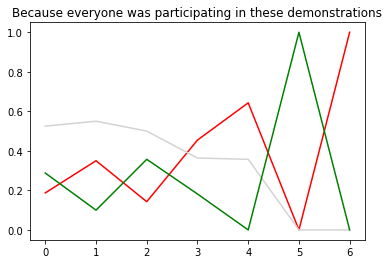

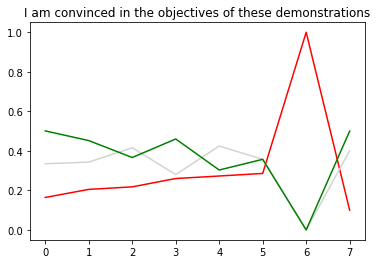

In [244]:
for reason in df_spring['why_par'].unique():
    if pd.isnull(reason): continue
    sub = df_spring[df_spring['why_par'] == reason]
    cross = pd.crosstab(sub['losses_total'], sub['overall_feeling'], normalize='index')
    
    fig, ax = plt.subplots()
    
    w = .2
    
    ax.plot(cross[-1], color='red')
    ax.plot(cross[0], color='lightgrey')
    ax.plot(cross[1], color='green')
    
    ax.set_title(reason)

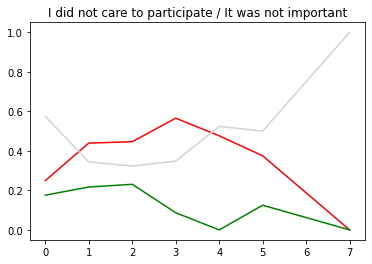

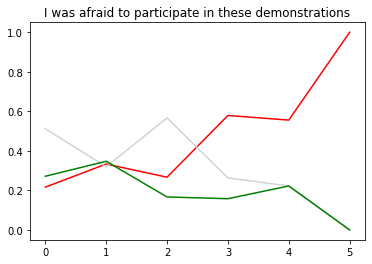

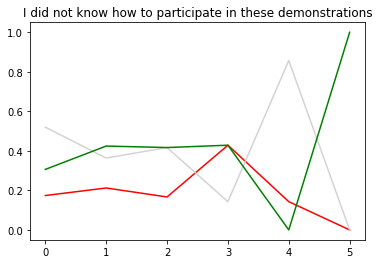

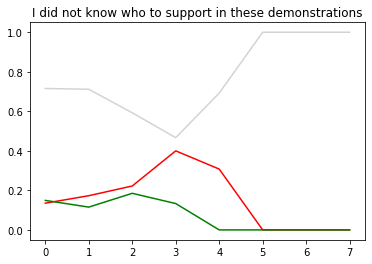

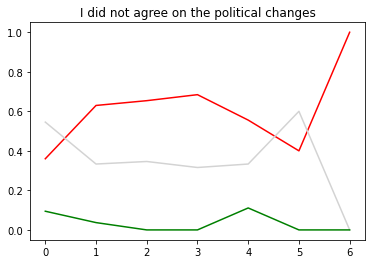

In [215]:
import matplotlib.pyplot as plt

for reason in df_spring['why_not_par'].unique():
    if pd.isnull(reason) or reason == 'Other': continue
    sub = df_spring[df_spring['why_not_par'] == reason]
    cross = pd.crosstab(sub['losses_total'], sub['overall_feeling'], normalize='index')
    
    fig, ax = plt.subplots()
    
    ax.plot(cross[-1], color='red')
    ax.plot(cross[0], color='lightgrey')
    ax.plot(cross[1], color='green')
    
    ax.set_title(reason)
    

In [245]:
df = df_personal.merge(df_spring, how='inner', on='qid')
features = df.drop('qid', axis=1)
df.head()

,qid,age,sex,education,work?,work_alt,full/part,sector,position_public,position_private,unemployment,mar_status,spouse_job,computer,car,religion,housing,income,household_income,income_enough,remittances,1st_language,2nd_language,participate,why_par,why_not_par,theft_personal,destruc_personal,destruc_public,loss_job,refuge_internal,leave_country,return_to_country,losses_total,overall_feeling,main_reason1,main_reason2,main_reason3,reason1_met,reason2_met,reason3_met,gender_equal,religious_equal,sharia_based,sep_leg_exec,sep_poli_army,no_absolute_power,workers_rights,social_protection,christ_islam_relations
0,1,40.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,Owned,19000.0,38000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,0,NaN,I did not care to participate / It was not imp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,Betterment of the economic situation,Increased social justice,Social and economic justice,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,"A relationship of brotherhood, citizenship and..."
1,1,40.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,Owned,19000.0,38000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,0,NaN,I was afraid to participate in these demonstra...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Civil and political freedoms, and emancipation...",Betterment of the economic situation,Fighting corruption,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,A relationship strained because of foreign con...
2,1,40.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,Owned,19000.0,38000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,0,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,"Civil and political freedoms, and emancipation...",Weakning the political and economic relations ...,Dignity,1.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,"A relationship of brotherhood, citizenship and..."
3,1,40.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,Owned,19000.0,38000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,0,NaN,I did not care to participate / It was not imp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,"Civil and political freedoms, and emancipation...",Betterment of the economic situation,Increased social justice,1.0,1.0,1.0,2.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN
4,1,40.0,Male,<NA>,Yes,<NA>,Full time (30 hours or more a week),Private,<NA>,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,Owned,19000.0,38000.0,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,0,NaN,I did not agree on the political changes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Betterment of the economic situation,Fighting corruption,Increased social justice,1.0,1.0,1.0,2.0,2.0,-2.0,2.0,2.0,-2.0,2.0,2.0,"A relationship of brotherhood, citizenship and..."


In [247]:
df.loc[:,'gender_equal':'social_protection'].columns

Index(['gender_equal', 'religious_equal', 'sharia_based', 'sep_leg_exec',
       'sep_poli_army', 'no_absolute_power', 'workers_rights',
       'social_protection'],
      dtype='object')

<BarContainer object of 8 artists>

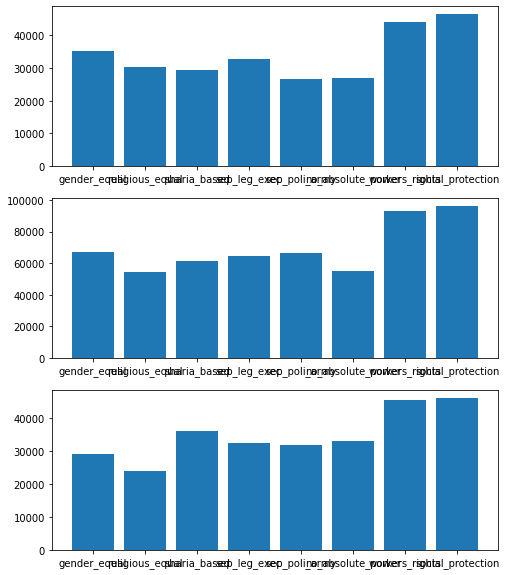

In [255]:
fig, ax = plt.subplots(nrows=3, figsize=[8,10])

ax[0].bar(x=df[df['overall_feeling'] == -1].loc[:,'gender_equal':'social_protection'].columns,
       height=df[df['overall_feeling'] == -1].loc[:,'gender_equal':'social_protection'].sum())

ax[1].bar(x=df[df['overall_feeling'] == 0].loc[:,'gender_equal':'social_protection'].columns,
       height=df[df['overall_feeling'] == 0].loc[:,'gender_equal':'social_protection'].sum())

ax[2].bar(x=df[df['overall_feeling'] == 1].loc[:,'gender_equal':'social_protection'].columns,
       height=df[df['overall_feeling'] == 1].loc[:,'gender_equal':'social_protection'].sum())

In [256]:
# Chi 2 on Education-level and Christian-Muslim relations

from scipy.stats import chi2_contingency

In [257]:
chi2_contingency(pd.crosstab(df['education'], df['christ_islam_relations']))

(12.35672450977446,
 0.828284042758819,
 18,
 array([[5.05859508e+04, 1.55822349e+04, 1.39982166e+04, 8.06359766e+03],
        [1.47922196e+03, 4.55651887e+02, 4.09332414e+02, 2.35793743e+02],
        [8.88679857e+02, 2.73744351e+02, 2.45916760e+02, 1.41659032e+02],
        [2.10989798e+02, 6.49922072e+01, 5.83853985e+01, 3.36325959e+01],
        [6.01435594e+02, 1.85263112e+02, 1.66430117e+02, 9.58711769e+01],
        [1.32613968e+03, 4.08497215e+02, 3.66971269e+02, 2.11391832e+02],
        [6.02582277e+02, 1.85616331e+02, 1.66747429e+02, 9.60539628e+01]]))

In [266]:
pd.crosstab(df['sex'], df['participate'])

participate,0,1
sex,,
Female,59813,9210
Male,58264,10857


In [258]:
chi2_contingency(pd.crosstab(df['sex'], df['participate']))

(155.23847927427784,
 1.2418781781841438e-35,
 1,
 array([[58996.61781185, 10026.38218815],
        [59080.38218815, 10040.61781185]]))

In [259]:
features = df.loc[:,'gender_equal':'social_protection'].dropna()
features.shape

(129275, 8)

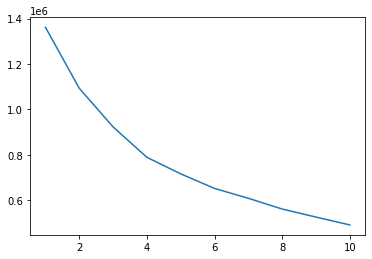

In [268]:
from sklearn.cluster import KMeans

K = range(1,11)
sum_squared_distance = []

for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(features)
  sum_squared_distance.append(kmeans.inertia_)

plt.plot(K, sum_squared_distance)

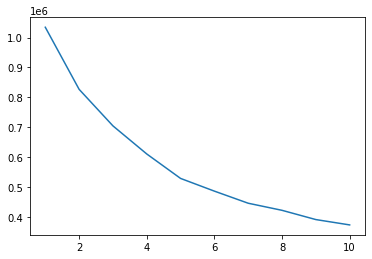

In [269]:
K = range(1,11)
sum_squared_distance = []

for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(comp)
  sum_squared_distance.append(kmeans.inertia_)

plt.plot(K, sum_squared_distance)

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

Z = scaler.fit_transform(features)

pca = PCA()

pca.fit(Z)

comp = pca.transform(Z)

comp

array([[-0.74870399, -0.40976961, -0.12631682, ..., -0.01902841,
         0.2248383 ,  0.01961921],
       [-1.66472432,  0.19300311,  0.74154662, ..., -0.09330408,
         0.02947655,  0.02928787],
       [-0.67240579,  0.15062035,  0.86058968, ...,  0.24243183,
         0.59108121, -0.90037955],
       ...,
       [ 1.21522796,  1.13472938, -0.5814826 , ...,  0.19011541,
        -0.47302312, -0.83823323],
       [ 0.46135302, -2.28356394, -0.94848582, ..., -0.25852242,
         0.23813562,  0.03541424],
       [-0.12421662, -0.26153822, -0.11931471, ..., -1.28587469,
         0.1674783 ,  0.11081013]])

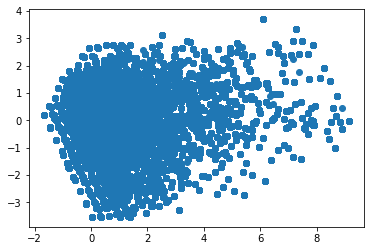

In [265]:
plt.scatter(comp[:,0],comp[:,1])

In [261]:
cum_variance_percent = np.cumsum(pca.explained_variance_ratio_)*100

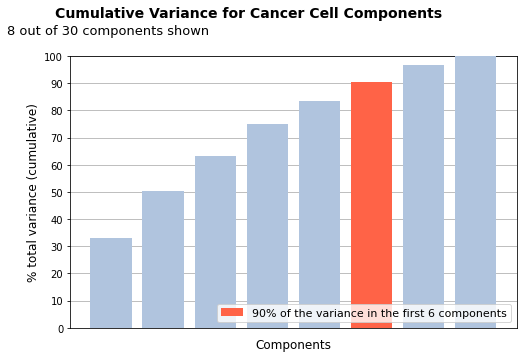

In [263]:
fig, ax = plt.subplots(figsize=[8,5])

fig.set_facecolor('white')

ax.set_xlabel('Components', fontsize=12, labelpad=10)
ax.set_xticks([])
ax.set_ylabel('% total variance (cumulative)', fontsize=12)
ax.set_ylim([0,100])
ax.set_yticks([t*10 for t in range(11)])


#### Try changing these values! Control how many components are shown in the graph,
#### and what threshold percentage we want to check.

show = 8             
percent_thresh = 90

####
####

# Main bars
rects = ax.bar(x=[num for num in range(show)], height=cum_variance_percent[:show], color='lightsteelblue', zorder=100)

# Function to determine the point at which the threshold is passed
def percent_of_variance(rects, percent):
  for i in range(len(rects)):
    if rects[i].get_height() > percent:
      return i

# Run function and print tomato bar.
first = percent_of_variance(rects, percent_thresh)
thresh = ax.bar(x=first, height=cum_variance_percent[first], color='tomato', zorder=200)

ax.set_title('Cumulative Variance for Cancer Cell Components', fontsize=14, fontweight='bold', x=.4, y=1.12)
ax.text(s=str(show) + ' out of 30 components shown', x=-2, y=108, fontsize=13)

ax.grid(b=True, axis='y')
ax.legend([thresh],[str(percent_thresh) + '% of the variance in the first ' + str(first+1) + ' components'], loc='lower right', fontsize=11).set_zorder(300)

plt.show()

In [ ]:
import matplotlib.pyplot as plt



for n in df_spring['losses_total'].unique():
    

plt.scatter(df_spring['losses_total'], df_spring['overall_feeling'])

In [ ]:
# df_international.head()

In [ ]:
# df_international = df_international.drop(df.loc[:,'q7001':'q700a16'], axis=1)
# df_international = df_international.drop(df.loc[:,'q708a':'q709'], axis=1)

# df_international.head(1)

In [ ]:
# df_international = df_international.rename(columns={'q7011':'US_influence_demo',
#                                                    'q7012':'EU_influence_demo',
#                                                    'q7013':'neighboring_influence_demo',
#                                                    'q701a':'trade_should_overall',
#                                                    'q701b':'globalism_good?',
#                                                    'q701c':'foreign_aid_should',
#                                                    'q702':'been_to_western_country',
#                                                    'q703':'your_country_should',
#                                                    'q704':'external_reform_pressure',
#                                                    'q705':'internal/external',
#                                                    'q706':'US_justifies_retort',
#                                                    'q707':'Americans_good',
#                                                    'q7111':'arab_israeli_is_obstacle',
#                                                    'q7112':'arab_israeli_must_be_solved',
#                                                    'q7113':'foreign_interference_obstacle',
#                                                    'q713':'US_should'})

# df_international = df_international.drop(df.loc[:,'q701d1':'q701d6'], axis=1)

# df_international.head()

In [ ]:
# df_international = df_international.replace({'Very negative':'-2',
#                                             'Somewhat negative':'-1',
#                                             'Neither positive nor negative':'0',
#                                             'Somewhat positive':'1',
#                                             'Very positive':'2',
#                                             'Strongly decrease':'-2',
#                                             'Somewhat decrease':'-1',
#                                             'Remains at its current level':'0',
#                                             'Somewhat increase':'1',
#                                             'Strongly increases':'2'})
# df_international.head()